# Coverage Analysis

In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../'))

import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
import poliastro 

import CtllDes 
from CtllDes.core import ctll, satellite


### Building test satellite

In [2]:
from poliastro.bodies import Earth

sat = satellite.Sat.from_vectors([8000,0,0]*u.km,
                       [0,5,2.5]*u.km/u.s,
                      attractor=Earth)

### Add Coverage Instrument

#### Camera symmetric FOV

In [3]:
from CtllDes.core.instrument import Instrument, Camera
cam = Camera(10,3)
sat.update_instruments(cam,f=True)

#check if Camera is a Coverage instrument, more on this later 
sat.cov_instruments

#### Push Broom Instrument

In [4]:
from CtllDes.core.instrument import PushBroom

broom = PushBroom(0.314*u.rad)
sat.update_instruments(broom,f=True)

#check if PushBroom is a Coverage instrument, more on this later 
sat.cov_instruments

# Defining targets 

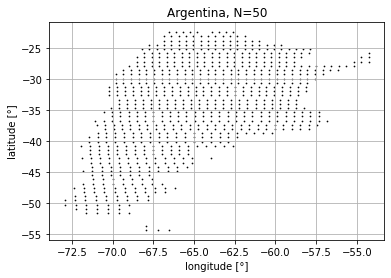

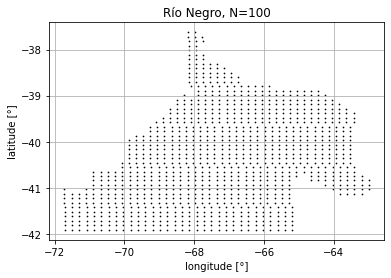

In [5]:
#In order to do a coverage analysis you must have targets. The module targets is the one in charge of that.
from CtllDes.targets.targets import Targets, Target
from shapely.geometry import Point

#simple target
tgt = Target(0,0)

#multiple targets
tgts = Targets([Target(i,i) for i in range(0,180,10)],tag='linear targets')

#define targets from country, administration level 0. 
tgts = Targets.from_country('Argentina')
figc = tgts.plot()
plt.title("Argentina, N=50")
plt.grid()
plt.xlabel("longitude [°]")
plt.ylabel("latitude [°]")
plt.show()


#define targets from state name, administration level 1
tgts = Targets.from_state('Río Negro', N=100)
figs = tgts.plot()
plt.title("Río Negro, N=100")
plt.xlabel("longitude [°]")
plt.ylabel("latitude [°]")
plt.grid()

plt.show()

In [6]:
# less points for country targets
tgts = Targets.from_country('Peru', N=6)

# Building Coverages
Coverages is the main container for Coverage analysis, it consist on Coverage (singular) objects. This objects are defined by 

<ul>
    <li>covs, an array with length = T*3600*24/dt containing ones or zeroes depending if the target is on sight or not.
    <li>Targets described earlier in this notebook
    <li>T == Time of propagation analysis
    <li>dt == Time interval of integration 
    <li>Merit figures
</ul>

If you want more information on the merit figures calculated for each target, I recommend reading the chapter 9 of O.C.D.M. from James R. Wertz.

<p style="text-align:center">
    <a href="https://www.amazon.es/Constellation-Design-Management-Technology-Library/dp/1881883078">
        <img src="https://images-na.ssl-images-amazon.com/images/I/41Ca0XLUv6L._SX303_BO1,204,203,200_.jpg">
    </a>
</p>

In [7]:
from CtllDes.requests.coverage import Coverages

In [8]:
#Build Coverages from satellite and single target
covs = Coverages.from_sat(sat, tgt, 10, dt=10, J2=True, drag=False)

#transform coverages into dataframe
covs.to_df()


/home/vancii/Documents/Instituto Balseiro/6to semestre/pi/CtllDes/venv/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in arccos
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/vancii/Documents/Instituto Balseiro/6to semestre/pi/CtllDes/CtllDes/utils/trigsf.py:59: RuntimeWarning: invalid value encountered in double_scalars
  A = np.arccos((cos_a-cos_b*cos_c)/(sin_b*sin_c))
/home/vancii/Documents/Instituto Balseiro/6to semestre/pi/CtllDes/CtllDes/utils/trigsf.py:60: RuntimeWarning: invalid value encountered in double_scalars
  B = np.arccos((cos_b-cos_a*cos_c)/(sin_a*sin_c))


target 0.00° 0.00°. 1 of 1


,T,dt,Satellite ID,Target,accumulated,mean gap light,mean gap dark,response time,average time gap,max gap
0,10,10,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(0, 0)",40,10.0,172790.0,125407.039202,250804.078867,368430


In [9]:
from CtllDes.requests.coverage import Coverages
covs = Coverages.from_sat(sat, tgts, 10, dt=100, J2=True, drag=False)
dfcov = covs.to_df()

/home/vancii/Documents/Instituto Balseiro/6to semestre/pi/CtllDes/venv/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in arccos
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


target -74.98° -14.70°. 1 of 9
target -71.83° -14.70°. 2 of 9
target -74.98° -11.05°. 3 of 9
target -71.83° -11.05°. 4 of 9
target -78.14° -7.40°. 5 of 9
target -74.98° -7.40°. 6 of 9
target -78.14° -3.76°. 7 of 9
target -74.98° -3.76°. 8 of 9
target -71.83° -3.76°. 9 of 9


In [10]:
dfcov

,T,dt,Satellite ID,Target,accumulated,mean gap light,mean gap dark,response time,average time gap,max gap
0,10,100,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-74.98181899999996, -14.700607799999977)",200,100.0,287900.0,253402.951731,506705.926612,641500
1,10,100,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-71.82786149999998, -14.700607799999977)",300,100.0,215900.0,199459.972219,398819.979164,558000
2,10,100,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-74.98181899999996, -11.052670599999981)",400,100.0,172700.0,191395.115175,382690.276652,545200
3,10,100,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-71.82786149999998, -11.052670599999981)",300,100.0,215900.0,204867.496238,409635.027202,545300
4,10,100,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-78.13577649999993, -7.404733399999987)",300,100.0,215900.0,166909.399236,333718.833198,474200
5,10,100,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-74.98181899999996, -7.404733399999987)",200,100.0,287900.0,255259.208242,510418.439634,623800
6,10,100,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-78.13577649999993, -3.7567961999999913)",300,100.0,215900.0,200086.005325,400072.045376,535400
7,10,100,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-74.98181899999996, -3.7567961999999913)",300,100.0,215900.0,200061.708531,400023.451788,535400
8,10,100,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-71.82786149999998, -3.7567961999999913)",300,100.0,215900.0,203002.164602,405904.363931,540300


In [11]:
lons,lats = sat.ssps(10, dt=5, J2=True, drag=False)
lons = lons*180/np.pi
lats = lats*180/np.pi

In [12]:
%matplotlib qt5

target_lons = [tgts.targets[i].lon + 180 for i in range(len(tgts.targets))]
target_lats = [tgts.targets[i].lat for i in range(len(tgts.targets))]

plt.figure(figsize=(10,10))
plt.scatter(lons,lats,c='red',s=1)
plt.ylim(-90,90)
plt.scatter(target_lons,target_lats,c='k', s=5)

In [13]:
accum = dfcov['accumulated'].values
accum = np.array([float(i) for i in accum])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(target_lons, target_lats, accum,
               antialiased=False)
ax.set_xlim(min(target_lons),max(target_lons))
ax.set_ylim(min(target_lats),max(target_lats))
#ax.scatter(lons,lats, np.zeros(len(lats)),s=1)
ax.scatter(target_lons,target_lats, np.zeros(len(target_lons)),s=100,c='k')

# What is a Coverage Instrument?

In order to be a Coverage Instrument first of all the object must be an Instrument. The coverage ability is defined by the interface of the library, i.e. a coverage method must be overwritten. See the example below.

In [14]:
#first lets check out the coverage method requirements to be correcly overwritten.
help(Instrument.coverage)

Help on function coverage in module CtllDes.core.instrument:

coverage(self, lons, lats, r, v, target, R)
    Coverage functions is associated with the coverage module.
    Any overwrited child method coverage must accept the specified parameters
    and return a list or iterable with 1 or 0, in view or not respectively.
    
    Parameters
    ----------
    lons : ~astropy.units.quantity.Quantity 
            array of longitudes as they come from the ssps method.
    lats : ~astropy.units.quantity.Quantity 
            array of latittudes as they come from the ssps method
    r : ~astropy.units.quantity.Quantity
            satellite's positions
    v : ~astropy.units.quantity.Quantity
            satellite's velocities
    target : ~CtllDes.targets.targets.Target
            desired target of coverage analysis
    R : ~astropy.units.quantity.Quantity 
            attractor mean radius 
    
    Returns
    -------
    cov : Iterable
            elements from iterable must be 1 or 0 

In [15]:
#So if you want to build a taylor made instrument, first you must specify 
#the correct arguments to the coverage method. And most importantly, return
#an Iterable containing ones or zeroes depending on the target being seen or not
#at that r,v. 

class GodInstrument(Instrument):
    def __init__(self):
        super().__init__()

    def coverage(self, lons, lats, r, v, target, R):
        return [1 for _ in range(len(r))]
    
#as you can see this is a silly example, God sees it all.

In [16]:
from CtllDes.requests.coverage import symmetric_disk

#What does exactly symmetric_disk do?
help(symmetric_disk)



#A more realistic Instrument that uses one of the few coverage methods already written.

class DiskInstrument(Instrument):
    def __init__(self):
        super().__init__()
        self.FOV_min = 0.1*u.rad
        self.FOV_max = 0.2*u.rad
        
    def coverage(self, lons, lats, r, v, target, R):
        return coverage.symmetric_disk(self.FOV_min,
                                      self.FOV_max,
                                      lons,
                                      lats,
                                      r,
                                      v,
                                      target,
                                      R)


Help on function symmetric_disk in module CtllDes.requests.coverage:

symmetric_disk(FOV_min, FOV_max, lons, lats, r, target, R)
    coverage method.
    
    Disk of coverage centered on subsatellite point.
    
    Parameters
    ----------
    FOV_min : ~astropy.units.quantity.Quantity
            minimum field of view in radians
    FOV_max : ~astropy.units.quantity.Quantity
            maximum field of view in radians
    
    * : default coverage parameters
            help(CtllDes.request.coverage.Instrument.coverage) for more
            info.



So the intuition here you must get is that the interface is the coverage method, with the default parameters needed to compute coverage figures.If you have extra parameters that define the coverage, for example, a roll angle allowed, this must be included as a parameter of the specific Instrument child class. 


In [17]:
#Define your own parameters.

from CtllDes.utils import trigsf


class OnOffCamera(Instrument):
    def __init__(self, thresh):
        super().__init__()
        self.threshold = thresh
        self._FOV = np.pi*u.rad/8
        
    @property
    def threshold(self):
        return self._threshold
    
    @threshold.setter
    def threshold(self,thresh):
        if not isinstance(thresh,u.Quantity):
            thresh = thresh * u.km
        elif thresh.unit.physical_type != 'length':
            raise ValueError("threshold must be length quantity")
        self._threshold = thresh.to(u.km)
    
    @property
    def FOV(self):
        return self._FOV
    
    
    def coverage(self,lons,lats,r,v,target,R):
        lams = trigsf.get_lam(r,self.FOV,R)
        
        angles = trigsf.get_angles(lons,lats,(target.x*u.deg).to(u.rad),
		(target.y*u.deg).to(u.rad))
        
        radiis = np.sqrt(np.sum(r**2,axis=1))
        
        cov = []
        for lam,angle,radii in zip(lams,angles,radiis):
            if angle < lam:
                if self.threshold < radii < 2*R :
                    cov.append(1)
                else:
                    cov.append(0)
            else:
                cov.append(0)
                
        return cov


In [18]:
onoffcam = OnOffCamera(300)
sat.update_instruments(onoffcam,f=True)
sat.instruments

In [19]:
newcovs = Coverages.from_sat(sat, tgts, 5, dt=5, J2=True)

/home/vancii/Documents/Instituto Balseiro/6to semestre/pi/CtllDes/venv/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in arcsin
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


target -74.98° -14.70°. 1 of 9
target -71.83° -14.70°. 2 of 9
target -74.98° -11.05°. 3 of 9
target -71.83° -11.05°. 4 of 9
target -78.14° -7.40°. 5 of 9
target -74.98° -7.40°. 6 of 9
target -78.14° -3.76°. 7 of 9
target -74.98° -3.76°. 8 of 9
target -71.83° -3.76°. 9 of 9


More spherical trigonometry calculations will be added (in development right now) to create coverage methods easier and faster.

In [20]:
newcovs.to_df()

,T,dt,Satellite ID,Target,accumulated,mean gap light,mean gap dark,response time,average time gap,max gap
0,5,5,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-74.98181899999996, -14.700607799999977)",0,0.000000,432000.000000,216002.500000,432000.000000,432000
1,5,5,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-71.82786149999998, -14.700607799999977)",30,30.000000,215985.000000,208231.967940,416458.936227,424085
2,5,5,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-74.98181899999996, -11.052670599999981)",200,200.000000,215900.000000,203622.944444,407240.891204,419250
3,5,5,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-71.82786149999998, -11.052670599999981)",190,190.000000,215905.000000,203566.758738,407128.519676,419190
4,5,5,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-78.13577649999993, -7.404733399999987)",195,97.500000,143935.000000,199094.056424,398183.115104,414530
5,5,5,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-74.98181899999996, -7.404733399999987)",260,130.000000,143913.333333,138674.448206,277343.899421,335690
6,5,5,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-78.13577649999993, -3.7567961999999913)",285,285.000000,215857.500000,199085.040278,398165.083854,414375
7,5,5,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-74.98181899999996, -3.7567961999999913)",240,240.000000,215880.000000,199040.907002,398076.816782,414325
8,5,5,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-71.82786149999998, -3.7567961999999913)",380,126.666667,107905.000000,137726.031192,275447.066782,335595


In [21]:
constellation = ctll.Ctll.from_sats(sat)

In [22]:
help(Camera)

Help on class Camera in module CtllDes.core.instrument:

class Camera(Instrument)
 |  Camera(f_l, s_w)
 |  
 |  Method resolution order:
 |      Camera
 |      Instrument
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, f_l, s_w)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  coverage(self, lons, lats, r, v, target, R)
 |      Coverage functions is associated with the coverage module.
 |      Any overwrited child method coverage must accept the specified parameters
 |      and return a list or iterable with 1 or 0, in view or not respectively.
 |      
 |      Parameters
 |      ----------
 |      lons : ~astropy.units.quantity.Quantity 
 |              array of longitudes as they come from the ssps method.
 |      lats : ~astropy.units.quantity.Quantity 
 |              array of latittudes as they come from the ssps method
 |      r : ~astropy.units.quantity.Quantity
 |              satellite's positions
 |      v : ~astro

In [23]:
from CtllDes.requests.coverage import symmetric_with_roll

#What does exactly symmetric_disk do?
help(symmetric_with_roll)



#A more realistic Instrument that uses one of the few coverage methods already written.

class RollCamera(Instrument):
    def __init__(self,FOV,roll_angle):
        """Constructor for RollCamera.
        
        Parameters
        ----------
        FOV : ~astropy.units.quantity.Quantity
            field of view, angle quantity
        roll_angle : ~astropy.units.quantity.Quantity
            maximum rolling angle
        """
        
        super().__init__()
        self.FOV = FOV.to(u.rad)
        self.roll = roll_angle.to(u.rad)
        
    def coverage(self, lons, lats, r, v, target, R):
        return symmetric_with_roll(self.FOV,
                                      lons,
                                      lats,
                                      r,
                                      v,
                                      target,
                                      R,
                                      roll_angle = self.roll)


Help on function symmetric_with_roll in module CtllDes.requests.coverage:

symmetric_with_roll(FOV, lons, lats, r, v, target, R, roll_angle=0)
    coverage method 
    
    This coverage method, is symmetric with the roll capabilities.
    It is just a potential coverage obtained by stipulating the new field of
    view, obtained by the roll angle in any direction. Perpendicular to velocity
    rolls are not taken into account since, increase in coverage from this 
    analysis are restricted to a few seconds of the satellite passing.



In [24]:
roll_cam = RollCamera(0.15*u.rad,15*u.deg)
sat.update_instruments(roll_cam, f=True)
sat.instruments[0]

In [27]:
roll_cov = Coverages.from_sat(sat,tgts,20, dt=5, drag=False, J2=True)

target -74.98° -14.70°. 1 of 9
target -71.83° -14.70°. 2 of 9
target -74.98° -11.05°. 3 of 9
target -71.83° -11.05°. 4 of 9
target -78.14° -7.40°. 5 of 9
target -74.98° -7.40°. 6 of 9
target -78.14° -3.76°. 7 of 9
target -74.98° -3.76°. 8 of 9
target -71.83° -3.76°. 9 of 9


In [28]:
rollcovdf = roll_cov.to_df()
rollcovdf 

,T,dt,Satellite ID,Target,accumulated,mean gap light,mean gap dark,response time,average time gap,max gap
0,20,5,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-74.98181899999996, -14.700607799999977)",2135,213.500000,156896.818182,217506.384722,435007.775622,628750
1,20,5,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-71.82786149999998, -14.700607799999977)",2210,184.166667,132753.076923,194640.276678,389275.559751,550125
2,20,5,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-74.98181899999996, -11.052670599999981)",2140,214.000000,156896.363636,170429.903197,340854.812587,545150
3,20,5,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-71.82786149999998, -11.052670599999981)",2340,195.000000,132743.076923,192086.998061,384169.002894,545180
4,20,5,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-78.13577649999993, -7.404733399999987)",2500,178.571429,115033.333333,168491.051317,336977.109867,461600
5,20,5,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-74.98181899999996, -7.404733399999987)",2350,180.769231,123260.714286,159962.183464,319919.373727,540225
6,20,5,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-78.13577649999993, -3.7567961999999913)",2255,225.500000,156885.909091,175450.048466,350895.103458,535275
7,20,5,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-74.98181899999996, -3.7567961999999913)",2325,211.363636,143806.250000,176455.647063,352906.300854,535270
8,20,5,ff5795d6-184f-4a68-b677-0c7b43c10c5c,"(-71.82786149999998, -3.7567961999999913)",2500,192.307692,123250.000000,133363.863614,266722.734462,373190


In [ ]:
roll_accum = rollcovdf['accumulated'].to_numpy(dtype=float)
roll_accum /= max(roll_accum)

response_time = rollcovdf['response time'].to_numpy()
response_time = 1/response_time
response_time -= min(response_time)
response_time /= max(response_time)

roll_avg = rollcovdf['average time gap'].to_numpy(dtype=float)
roll_avg = 1/roll_avg
roll_avg -= min(roll_avg)
roll_avg /= max(roll_avg) 

In [ ]:
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(projection='3d')
ax1.plot_trisurf(target_lons, target_lats, roll_accum,
               antialiased=False,cmap='viridis')
ax1.set_title("Coverage over Perú")
ax1.set_xlabel("longitude [°]")
ax1.set_ylabel("latitude [°]")
ax1.set_zlabel("Accumulated time of coverage, normalized")

ax1.set_xlim(min(target_lons),max(target_lons))
ax1.set_ylim(min(target_lats),max(target_lats))
ax1.set_zlim(min(roll_accum),max(roll_accum))

ax1.scatter(target_lons,target_lats, np.zeros(len(target_lons)),
           s=100,c='k')


In [ ]:
fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.add_subplot(projection='3d')
ax2.plot_trisurf(target_lons, target_lats, response_time,
               antialiased=False,cmap='viridis')

ax2.set_title("Response time over Perú")
ax2.set_xlabel("longitude [°]")
ax2.set_ylabel("latitude [°]")
ax2.set_zlabel("1/tᵣ normalized")


ax2.set_xlim(min(target_lons),max(target_lons))
ax2.set_ylim(min(target_lats),max(target_lats))

ax2.scatter(target_lons,target_lats, np.zeros(len(target_lons)),
           s=100,c='k')

In [ ]:
fig3 = plt.figure(figsize=(10,10))
ax3 = fig3.add_subplot(projection='3d')
ax3.plot_trisurf(target_lons, target_lats, roll_avg,
               antialiased=False,cmap='viridis')

ax3.set_title("Average time gap over Perú")
ax3.set_xlabel("longitude [°]")
ax3.set_ylabel("latitude [°]")
ax3.set_zlabel("Averaget time gap normalized")


ax3.set_xlim(min(target_lons),max(target_lons))
ax3.set_ylim(min(target_lats),max(target_lats))

ax3.scatter(target_lons,target_lats, np.zeros(len(target_lons)),
           s=100,c='k')